In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

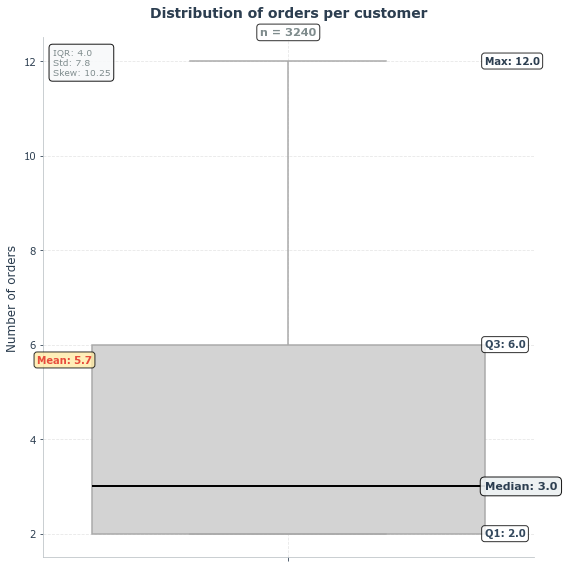

In [2]:
df = pd.read_csv("bonuscheques.csv", encoding = "cp1251")

# 1. Count purchases per customer
purchase_counts = df['card'].value_counts()

# 2. Keep only customers with more than 1 purchase
customers_multiple = purchase_counts[purchase_counts > 1].index

df_filtered = df[df['card'].isin(customers_multiple)]

# 3. Keep only cards that contain digits
df_clean = df_filtered[df_filtered['card'].str.isdigit()]

# 4. Distribution of orders per customer (box plot)
orders_per_client = df_clean.groupby("card")["doc_id"].nunique()

q1 = np.percentile(orders_per_client, 25)
median = np.median(orders_per_client)
q3 = np.percentile(orders_per_client, 75)
iqr = q3 - q1

lower_whisker = orders_per_client[orders_per_client >= (q1 - 1.5 * iqr)].min()
upper_whisker = orders_per_client[orders_per_client <= (q3 + 1.5 * iqr)].max()

mean_val = orders_per_client.mean()
count = len(orders_per_client)

plt.figure(figsize=(8, 8))

ax = sns.boxplot(
    y=orders_per_client,
    showfliers = False,
    color = 'lightgray',  
    linewidth = 1.5,
    boxprops = dict(facecolor = 'lightgray', edgecolor = 'darkgray'),
    whiskerprops = dict(color = 'darkgray', linewidth = 1.5),
    capprops = dict(color = 'darkgray', linewidth = 1.5),
    medianprops = dict(color = 'black', linewidth = 2)
)

x_position = 0.4 
text_props = {'fontsize': 10, 'weight': 'bold', 'bbox': dict(boxstyle = "round,pad=0.3", facecolor = 'white', alpha = 0.8)}

#ax.text(x_position, lower_whisker, f'Min: {lower_whisker:.1f}',
        #ha='left', va='center', color='#2c3e50', **text_props)

ax.text(x_position, q1, f'Q1: {q1:.1f}',
        ha='left', va='center', color='#34495e', **text_props)

ax.text(x_position, median, f'Median: {median:.1f}',
        ha='left', va='center', color='#2c3e50',
        fontsize=11, weight='bold',
        bbox=dict(boxstyle="round,pad=0.4", facecolor='#ecf0f1', alpha=0.9))

ax.text(x_position, q3, f'Q3: {q3:.1f}',
        ha='left', va='center', color='#34495e', **text_props)

ax.text(x_position, upper_whisker, f'Max: {upper_whisker:.1f}',
        ha='left', va='center', color='#2c3e50', **text_props)

ax.text(-x_position, mean_val, f'Mean: {mean_val:.1f}',
        ha='right', va='center', color='#e74c3c',
        fontsize=10, weight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor='#ffeaa7', alpha=0.8))

ax.text(0, ax.get_ylim()[1], f'n = {count}',
        ha='center', va='bottom', color='#7f8c8d',
        fontsize=11, weight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

stats_text = f'IQR: {iqr:.1f}\nStd: {orders_per_client.std():.1f}\nSkew: {orders_per_client.skew():.2f}'

ax.text(0.02, 0.98, stats_text,
        transform=ax.transAxes, ha='left', va='top',
        fontsize=9, color='#7f8c8d',
        bbox=dict(boxstyle="round,pad=0.4", facecolor='#f8f9fa', alpha=0.9))

plt.title("Distribution of orders per customer",
          fontsize = 14, weight = 'bold', color = '#2c3e50', pad = 20)
plt.ylabel("Number of orders", fontsize = 12, color = '#2c3e50')
plt.xlabel("")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#bdc3c7')
ax.spines['bottom'].set_color('#bdc3c7')
ax.tick_params(colors='#2c3e50')
ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()